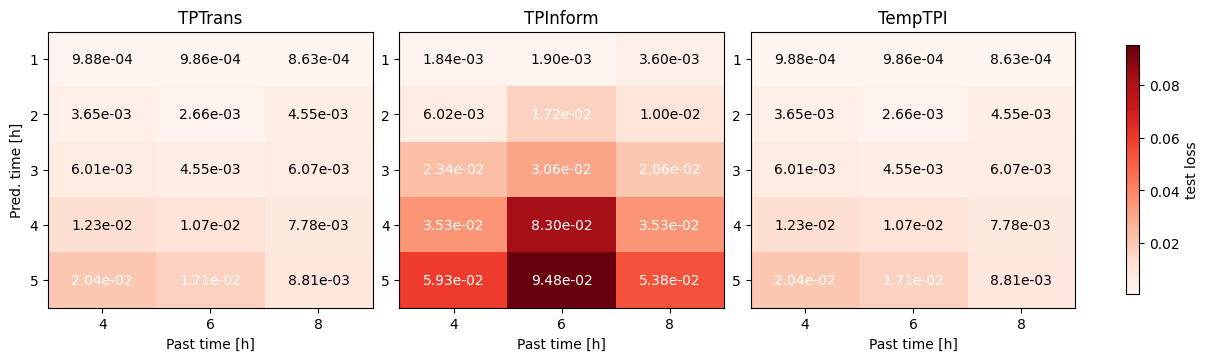

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps



# ------------------------------------------------------------
# Configuration
# ------------------------------------------------------------
cols = ["240", "360", "480"]                       # window size columns
rows = ["60", "120", "180", "240", "300"]          # prediction horizons
titles = ["TPTrans", "TPInform", "TempTPI"]


csv_TPT = "results_tptrans_b1.csv"
csv_TPI = "results_tpinform_b1.csv"
csv_TTPI = "results_tptrans_b1.csv"

files = [csv_TPT, csv_TPI, csv_TTPI]
datasets = []

# ------------------------------------------------------------
# Helper: convert raw CSV into matrix for each heatmap
# ------------------------------------------------------------
def make_matrix(df):
    # df entries contain window_size_minutes and pred_size_minutes
    # rows: pred_size_minutes
    # cols: window_size_minutes
    mat = np.full((len(rows), len(cols)), np.nan)

    for i, r in enumerate(rows):
        for j, c in enumerate(cols):
            val = df.loc[
                (df["pred_size_minutes"] == int(r)) &
                (df["window_size_minutes"]-df["pred_size_minutes"] == int(c)),
                "test_loss"
            ]
            if not val.empty:
                mat[i, j] = val.iloc[0]
    return mat

# ------------------------------------------------------------
# Load CSVs and build matrices
# ------------------------------------------------------------
for f in files:
    df = pd.read_csv(f)
    datasets.append(make_matrix(df))

# global color limits shared across heatmaps
vmin = np.nanmin([np.nanmin(m) for m in datasets])
vmax = np.nanmax([np.nanmax(m) for m in datasets])

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), constrained_layout=True)

cmap = colormaps["Reds"]
for e, (ax, mat, title) in enumerate(zip(axes, datasets, titles)):
    im = ax.imshow(mat, vmin=vmin, vmax=vmax, aspect="auto", cmap=cmap)
    ax.set_title(title)
    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(rows)))
    ax.set_xticklabels([str(int(x)//60) for x in cols])
    ax.set_yticklabels([str(int(x)//60) for x in rows])
    ax.set_xlabel("Past time [h]")
    if e==0: 
        ax.set_ylabel("Pred. time [h]")
    # write values into cells
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if not np.isnan(mat[i, j]):
                ax.text(j, i, f"{mat[i,j]:.2e}",
                        ha="center", va="center", color="black" if mat[i,j]<0.015 else "white")

# single shared colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.9)
cbar.set_label("test loss")

plt.show()

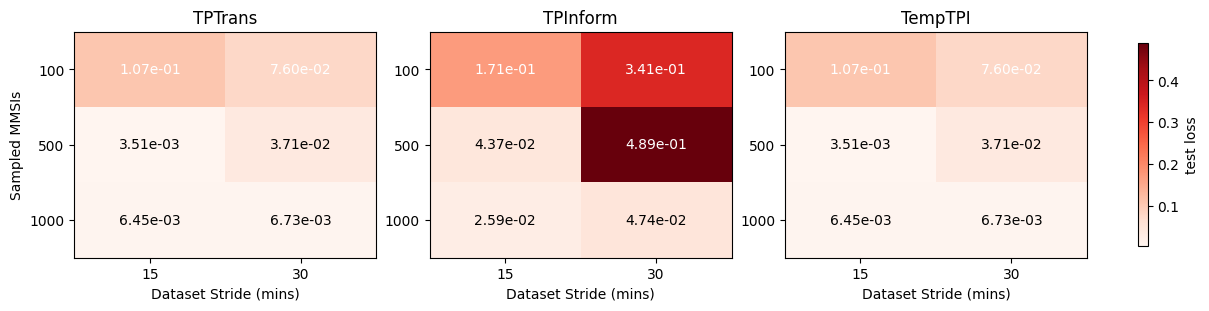

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# ------------------------------------------------------------
# Inputs: paths to the three CSV files
# ------------------------------------------------------------
csv_TPT = "results_tptrans_b2.csv"
csv_TPI = "results_tpinform_b2.csv"
csv_TTPI = "results_tptrans_b2.csv"

# ------------------------------------------------------------
# Configuration
# ------------------------------------------------------------
cols = ["15", "30"]                       # window size columns
rows = ["100", "500", "1000"]          # prediction horizons
titles = ["TPTrans", "TPInform", "TempTPI"]

files = [csv_TPT, csv_TPI, csv_TTPI]
datasets = []

# ------------------------------------------------------------
# Helper: convert raw CSV into matrix for each heatmap
# ------------------------------------------------------------
def make_matrix(df):
    # df entries contain window_size_minutes and pred_size_minutes
    # rows: pred_size_minutes
    # cols: window_size_minutes
    mat = np.full((len(rows), len(cols)), np.nan)

    for i, r in enumerate(rows):
        for j, c in enumerate(cols):
            val = df.loc[
                (df["k"] == int(r)) &
                (df["stride"] == int(c)),
                "test_loss"
            ]
            if not val.empty:
                mat[i, j] = val.iloc[0]
    return mat

# ------------------------------------------------------------
# Load CSVs and build matrices
# ------------------------------------------------------------
for f in files:
    df = pd.read_csv(f)
    datasets.append(make_matrix(df))

# global color limits shared across heatmaps
vmin = np.nanmin([np.nanmin(m) for m in datasets])
vmax = np.nanmax([np.nanmax(m) for m in datasets])

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)

cmap = colormaps["Reds"]
for e, (ax, mat, title) in enumerate(zip(axes, datasets, titles)):
    im = ax.imshow(mat, vmin=vmin, vmax=vmax, aspect="auto", cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel("Dataset Stride (mins)")
    ax.set_xticks(range(len(cols)))
    ax.set_yticks(range(len(rows)))
    ax.set_xticklabels(cols)
    ax.set_yticklabels(rows)
    if e==0:
        ax.set_ylabel("Sampled MMSIs")
    # write values into cells
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            if not np.isnan(mat[i, j]):
                ax.text(j, i, f"{mat[i,j]:.2e}",
                        ha="center", va="center", color="black" if mat[i,j]<0.05 else "white")

# single shared colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.9)
cbar.set_label("test loss")

plt.show()